In [3]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

# Texture features

* Gabor filters
* fractal analysis: Hurst coeficient

tbd...

>see also:
* Texture [DIP](../00-Preface/06-References.ipynb#[DIP]) p506


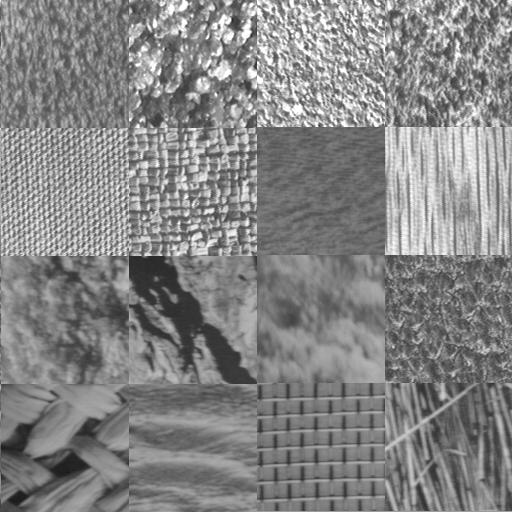

In [4]:
Image('http://www.tina-vision.net/ilib/ims_broadatz.jpg')